# Capstone Project:
# Accidents with cyclists — A guide to avoid them

In [1]:
import pandas as pd
import numpy as np

In [24]:
#  read the .csv file
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

#  5 first rows in the df
df.head()

C:\Users\PatrickdosAnjos\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [25]:
print('The df dataframe has:\n'
      '—', df.size, 'variables;\n'
      '—', df.shape[0], 'differents rows;\n'
      'And', df.shape[1], 'differents columns.')

The df dataframe has:
— 7397574 variables;
— 194673 differents rows;
And 38 differents columns.


In [26]:
df.info() #  info in this df, with the columns, non-null count and dtype (and others)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

## The Project - Bicycles involved in the collision

#### The project will deal with accidents involving cycling victims, in the case of this 'df' used, it is in the PEDCYLCOUNT column. Clearly, all necessary data will later be specified to establish a machine learning algorithm and provide some relationship and demonstrate (perhaps) the conditions under which the cyclist must remain more alert, or even refrain from using the bicycle, or due the high level of insecurity caused or by other factors, such as climate and others.

In [27]:
#  choice of columns to pre-process the dataframe
df = df[['ADDRTYPE', 'ROADCOND', 'LIGHTCOND', 'WEATHER', 'PEDCYLCOUNT', 'SEVERITYCODE']]

#  drop all NaN values
df = df.dropna()

# 5 first rows in df partially pre-processed
df.head().reset_index().drop(['index'], axis=1)

,ADDRTYPE,ROADCOND,LIGHTCOND,WEATHER,PEDCYLCOUNT,SEVERITYCODE
0,Intersection,Wet,Daylight,Overcast,0,2
1,Block,Wet,Dark - Street Lights On,Raining,0,1
2,Block,Dry,Daylight,Overcast,0,1
3,Block,Dry,Daylight,Clear,0,1
4,Intersection,Wet,Daylight,Raining,0,2


In [28]:
df.shape  #  shape of new df

(187525, 6)

In [29]:
#  choice of data where there are accidents involving cyclists
df = df[df['PEDCYLCOUNT'] > 0]

#  counting values in SEVERITYCODE
df['SEVERITYCODE'].value_counts()

2    4793
1     676
Name: SEVERITYCODE, dtype: int64

In [30]:
#  process to balance the df

#  count classes
count_class2, count_class1 = df['SEVERITYCODE'].value_counts()

#  divide and balace the target class
df_class1 = df[df['SEVERITYCODE'] == 1]
df_class2 = df[df['SEVERITYCODE'] == 2]
df_class2_2 = df_class2.sample(count_class1, random_state=0)
df_2 = pd.concat([df_class2_2, df_class1], axis=0)

# print the results
print('Random under-sampling:')
print(df_2['SEVERITYCODE'].value_counts())

Random under-sampling:
2    676
1    676
Name: SEVERITYCODE, dtype: int64


In [31]:
df_2.info()  #  info of new dataframe, df_2, balanced

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1352 entries, 192552 to 194585
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ADDRTYPE      1352 non-null   object
 1   ROADCOND      1352 non-null   object
 2   LIGHTCOND     1352 non-null   object
 3   WEATHER       1352 non-null   object
 4   PEDCYLCOUNT   1352 non-null   int64 
 5   SEVERITYCODE  1352 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 73.9+ KB


(<matplotlib.axes._subplots.AxesSubplot at 0x1f323fec088>,
 Clear                       944
 Overcast                    207
 Raining                     150
 Unknown                      46
 Other                         2
 Snowing                       1
 Sleet/Hail/Freezing Rain      1
 Fog/Smog/Smoke                1
 Name: WEATHER, dtype: int64)

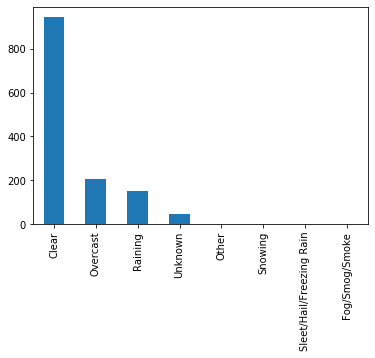

In [32]:
#  description of WEATHER column in df_2
df_2['WEATHER'].value_counts().plot(kind='bar'), df_2['WEATHER'].value_counts()

In [33]:
# categorical values of the WEATHER column and subsequent One Hot Encoding process
weather = df_2['WEATHER']
weather = pd.concat([weather, pd.get_dummies(df_2['WEATHER'])], axis=1).drop(['WEATHER', 'Unknown', 'Other'], axis=1)
weather.head().reset_index().drop(['index'], axis=1)

,Clear,Fog/Smog/Smoke,Overcast,Raining,Sleet/Hail/Freezing Rain,Snowing
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


(<matplotlib.axes._subplots.AxesSubplot at 0x1f32c5dc9c8>,
 Intersection    733
 Block           617
 Alley             2
 Name: ADDRTYPE, dtype: int64)

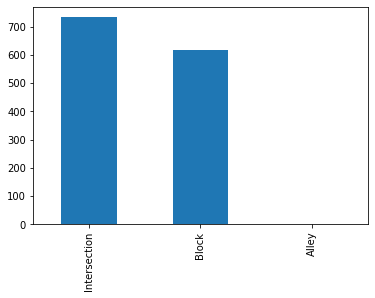

In [34]:
#  description of ADDRTYPE column in df_2
df_2['ADDRTYPE'].value_counts().plot(kind='bar'), df_2['ADDRTYPE'].value_counts()

In [35]:
# categorical values of the ADDRTYPE column and subsequent One Hot Encoding process
add_type = df_2['ADDRTYPE']
add_type = pd.concat([add_type, pd.get_dummies(df_2['ADDRTYPE'])], axis=1).drop(['ADDRTYPE'], axis=1)
add_type.head().reset_index().drop(['index'], axis=1)

,Alley,Block,Intersection
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,0,1


(<matplotlib.axes._subplots.AxesSubplot at 0x1f324e99948>,
 Dry               1061
 Wet                227
 Unknown             53
 Ice                  3
 Standing Water       3
 Snow/Slush           2
 Sand/Mud/Dirt        2
 Other                1
 Name: ROADCOND, dtype: int64)

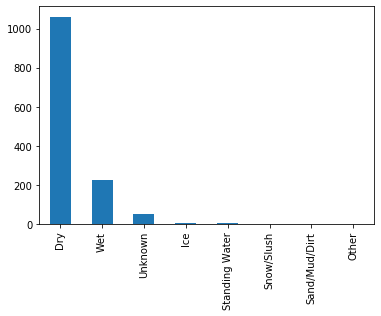

In [36]:
#  description of ROADCOND column in df_2
df_2['ROADCOND'].value_counts().plot(kind='bar'), df_2['ROADCOND'].value_counts()

In [37]:
#  categorical values of the ROADCOND column and subsequent One Hot Encoding process
road_cond = df_2['ROADCOND']
road_cond = pd.concat([road_cond, pd.get_dummies(df_2['ROADCOND'])], axis=1).drop(['ROADCOND', 'Unknown', 'Other'], axis=1)
road_cond.head().reset_index().drop(['index'], axis=1)

,Dry,Ice,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


(<matplotlib.axes._subplots.AxesSubplot at 0x1f324f179c8>,
 Daylight                    994
 Dark - Street Lights On     225
 Dusk                         53
 Unknown                      46
 Dawn                         19
 Dark - No Street Lights       8
 Dark - Street Lights Off      7
 Name: LIGHTCOND, dtype: int64)

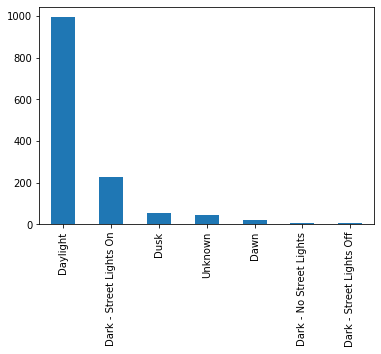

In [38]:
#  description of LIGHTCOND column in df_2
df_2['LIGHTCOND'].value_counts().plot(kind='bar'), df_2['LIGHTCOND'].value_counts()

In [39]:
#  categorical values of the LIGHTCOND column and subsequent One Hot Encoding process
light_cond = df_2['LIGHTCOND']
light_cond = pd.concat([light_cond, pd.get_dummies(df_2['LIGHTCOND'])], axis=1).drop(['LIGHTCOND', 'Unknown'], axis=1)
light_cond.head().reset_index().drop(['index'], axis=1)

,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dawn,Daylight,Dusk
0,0,0,1,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,0,1,0


In [40]:
#  values of the target variable and subsequent transformation process from numerical to categorical values in the target variable
y = df_2['SEVERITYCODE']
y.replace(to_replace=[1, 2], value=['Property Damage', 'Injury'], inplace=True)

#  values of the predictor variables
x = pd.concat([weather, add_type, road_cond, light_cond], axis=1)

#  the final pre-processed dataset """"""5 ROWS ONLY!!!!""""""
x_y = pd.concat([x, y], axis=1)
x_y.head().reset_index().drop(['index'], axis=1)

,Clear,Fog/Smog/Smoke,Overcast,Raining,Sleet/Hail/Freezing Rain,Snowing,Alley,Block,Intersection,Dry,...,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dawn,Daylight,Dusk,SEVERITYCODE
0,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,Injury
1,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,Injury
2,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,Injury
3,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,Injury
4,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,Injury


In [41]:
from sklearn.model_selection import train_test_split

#  normalized, value 0 or 1 after One Hot Encoding
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0) 

print ('Train set:\n'
       '- The x_train shape is', x_train.shape, 'and y_train shape is',  y_train.shape, '\n',
       'Test set:\n'
       '- The x_test shape is', x_test.shape, 'and y_test shape is', y_test.shape)

Train set:
- The x_train shape is (946, 21) and y_train shape is (946,) 
 Test set:
- The x_test shape is (406, 21) and y_test shape is (406,)


In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#  general decision tree classifier to be submitted in the GridSearchCV algorithm
dt_model = DecisionTreeClassifier()

#  the parameters for the GridSearchCV and posterior best parameters and your score
parameters = {'criterion':['gini', 'entropy'],
              'max_depth':range(5,11),
              'max_leaf_nodes':range(5,11),
              'min_samples_leaf':range(5,11)}
grid = GridSearchCV(estimator = dt_model, param_grid = parameters).fit(x_train, y_train)

print(f'The best parameters are {grid.best_params_};\n'
      f'And the best score is {grid.best_score_.round(4)}.')

The best parameters are {'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 10};
And the best score is 0.5264.


In [43]:
# the implemented decision tree with best hyperparameters
dt_model = DecisionTreeClassifier(criterion=grid.best_params_.get('criterion'),
                                  max_depth=grid.best_params_.get('max_depth'),
                                  max_leaf_nodes=grid.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf=grid.best_params_.get('min_samples_leaf'))
dt_model.fit(x_train,y_train)
dt_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
#  predicted values for decision tree
yh = dt_model.predict(x_test)

from sklearn import metrics

#  values of evaluate in decision tree, in test data
accuracy = metrics.accuracy_score(y_test, yh)
recall_score = metrics.recall_score(y_test, yh, average='weighted')
precision_score = metrics.precision_score(y_test, yh, average='weighted')
f1_score = metrics.f1_score(y_test, yh, average='weighted')

dic = {'Evaluation':[accuracy, recall_score, precision_score, f1_score]}
tabel = pd.DataFrame(dic).round(4)*100
tabel.index = ['Accuracy (%)', 'Recall Score (%)',  'Precision Score (%)', 'F1 Score (%)']
tabel

,Evaluation
Accuracy (%),51.23
Recall Score (%),51.23
Precision Score (%),51.20
F1 Score (%),51.21


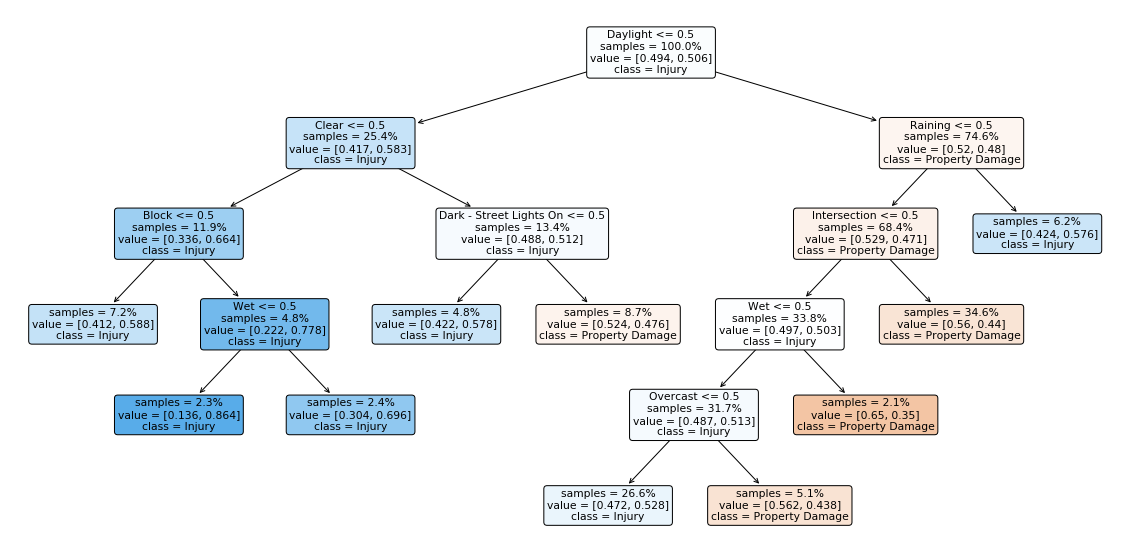

In [45]:
import matplotlib.pyplot as plt
from sklearn import tree

#  the "deploy" of the implemented decision tree
fig = plt.figure(figsize=(20,10))
treee = tree.plot_tree(dt_model,
                       feature_names=x.columns,
                       class_names=['Property Damage', 'Injury'],
                       filled=True, proportion=True, impurity=False, rounded=True)

#  """"""INFO""""""
#  In left, the main sentence is FALSE and right is TRUE
#  FOR EXAMPLE — In the pricipal node is the " 'Daylight' <= 0.5 " (the values is binaries, so is 1 or 0)
#  IF is "Daylight" go to the right, if not, go to the left
# """""""""""""""""